# Final Fantasy 14 online job prediction

One of my favorite games ever has been final fantasy 14 online 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree

weapon_data = pd.read_csv('ff14_weapons_250.csv')
weapon_data

,name,category,level,damage,autoAttack,delay,isUnique,isTradeable,Strength,Vitality,CriticalHit,Determination,Tenacity,SkillSpeed,DirectHitRate,Dexterity,Intelligence,SpellSpeed,Mind,Piety
0,Edenmorn Bastard Sword,Gladiator's Arm,535,134.0,100.05,2.24,1,0,518.0,597.0,379.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Augmented Cryptlurker's Sword,Gladiator's Arm,530,133.0,99.30,2.24,1,0,516.0,593.0,263.0,0.0,376.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Diamond Zeta Bastard Sword,Gladiator's Arm,525,132.0,98.56,2.24,1,0,503.0,574.0,372.0,261.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cryptlurker's Sword,Gladiator's Arm,520,131.0,97.81,2.24,1,0,490.0,556.0,258.0,0.0,368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Augmented Exarchic Sword,Gladiator's Arm,520,118.0,88.10,2.24,0,0,441.0,500.0,0.0,232.0,331.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,Shire Astrometer,Astrologian's Arm,260,113.0,88.53,3.20,1,0,0.0,169.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169.0,134.0
1714,Sophic Star,Astrologian's Arm,255,112.0,87.46,3.20,1,0,0.0,161.0,0.0,124.0,0.0,0.0,0.0,0.0,0.0,91.0,162.0,0.0
1715,Kinna Astrometer,Astrologian's Arm,255,112.0,87.46,3.20,1,0,0.0,161.0,129.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,162.0,0.0
1716,Koppranickel Planisphere,Astrologian's Arm,255,101.0,78.93,3.20,0,1,0.0,145.0,0.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0,83.0


In [2]:
weapon_data.describe()


,level,damage,autoAttack,delay,isUnique,isTradeable,Strength,Vitality,CriticalHit,Determination,Tenacity,SkillSpeed,DirectHitRate,Dexterity,Intelligence,SpellSpeed,Mind,Piety
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,382.085565,116.580326,101.769732,2.958929,0.728172,0.214785,144.845169,385.647264,150.153085,135.868452,27.310827,33.671129,81.115250,83.998836,68.227590,30.724680,68.622817,29.929569
std,83.151567,24.621851,19.533882,0.346243,0.445031,0.410792,201.793471,171.855644,166.896207,157.795870,86.567374,84.062264,141.682706,173.685525,157.964709,89.143027,158.008588,93.515482
min,250.000000,73.000000,52.690000,2.080000,0.000000,0.000000,0.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,300.000000,99.000000,87.360000,2.640000,0.000000,0.000000,0.000000,221.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,385.000000,113.000000,100.800000,3.040000,1.000000,0.000000,0.000000,369.000000,97.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,450.000000,132.750000,114.765000,3.200000,1.000000,0.000000,297.000000,459.000000,292.000000,265.250000,0.000000,0.000000,152.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,535.000000,180.000000,153.650000,3.440000,1.000000,1.000000,725.000000,836.000000,531.000000,531.000000,504.000000,403.000000,526.000000,725.000000,725.000000,526.000000,725.000000,498.000000


In [3]:
weapon_data.isnull().sum()

name             0
category         0
level            0
damage           0
autoAttack       0
delay            0
isUnique         0
isTradeable      0
Strength         0
Vitality         0
CriticalHit      0
Determination    0
Tenacity         0
SkillSpeed       0
DirectHitRate    0
Dexterity        0
Intelligence     0
SpellSpeed       0
Mind             0
Piety            0
dtype: int64

In [4]:
X = weapon_data.drop(columns=['name','category','damage','isUnique','isTradeable'])
X

,level,autoAttack,delay,Strength,Vitality,CriticalHit,Determination,Tenacity,SkillSpeed,DirectHitRate,Dexterity,Intelligence,SpellSpeed,Mind,Piety
0,535,100.05,2.24,518.0,597.0,379.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,530,99.30,2.24,516.0,593.0,263.0,0.0,376.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,525,98.56,2.24,503.0,574.0,372.0,261.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,520,97.81,2.24,490.0,556.0,258.0,0.0,368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,520,88.10,2.24,441.0,500.0,0.0,232.0,331.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,260,88.53,3.20,0.0,169.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169.0,134.0
1714,255,87.46,3.20,0.0,161.0,0.0,124.0,0.0,0.0,0.0,0.0,0.0,91.0,162.0,0.0
1715,255,87.46,3.20,0.0,161.0,129.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,162.0,0.0
1716,255,78.93,3.20,0.0,145.0,0.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0,83.0


In [5]:
y = weapon_data['category']
y

0         Gladiator's Arm
1         Gladiator's Arm
2         Gladiator's Arm
3         Gladiator's Arm
4         Gladiator's Arm
              ...        
1713    Astrologian's Arm
1714    Astrologian's Arm
1715    Astrologian's Arm
1716    Astrologian's Arm
1717    Astrologian's Arm
Name: category, Length: 1718, dtype: object

In [6]:
model = DecisionTreeClassifier()
model.fit(X, y)
predictions = model.predict([ [535,125.6,2.8,719,800,531,0,0,0,531,0,0,0,0,0] ])
predictions

array(["Lancer's Arm"], dtype=object)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score (y_test, predictions)
score

0.9476744186046512

In [8]:
#joblib.dump(model, 'job-identifier.joblib')
model = joblib.load('job-identifier.joblib')
predictions = model.predict([ [535,125.6,2.8,719,800,531,0,0,0,531,0,0,0,0,0] ])
predictions

array(["Lancer's Arm"], dtype=object)

In [9]:
tree.export_graphviz(model, out_file = 'job-identifier.dot', feature_names=['level','autoAttack','delay','Strength','Vitality','CriticalHit','Determination','Tenacity','SkillSpeed','DirectHitRate','Dexterity','Intelligence','SpellSpeed','Mind','Piety'], class_names =sorted(y.unique()), label='all', rounded=True, filled=True)

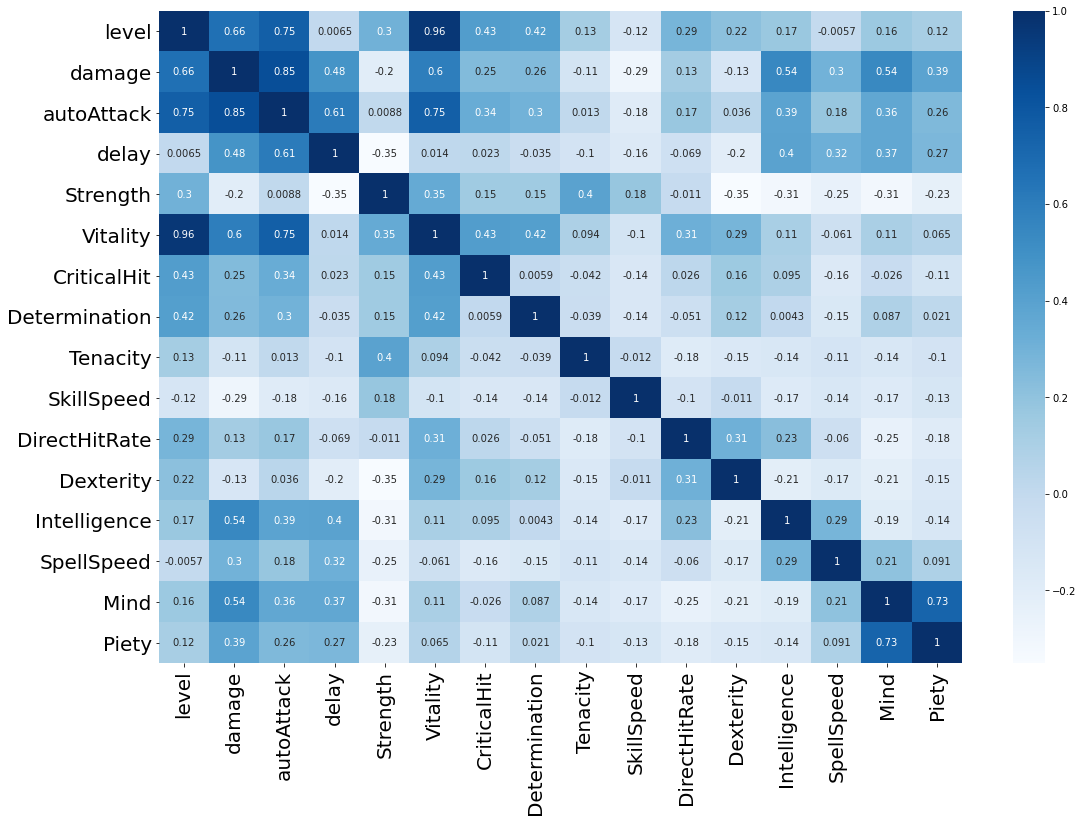

In [10]:
quant_features = ['level', 'damage', 'autoAttack', 'delay', 'Strength', 'Vitality', 'CriticalHit',
                  'Determination', 'Tenacity', 'SkillSpeed', 'DirectHitRate', 'Dexterity', 'Intelligence',
                  'SpellSpeed', 'Mind', 'Piety']

cor = weapon_data[quant_features].corr()
plt.figure(figsize=(18,12))
heat = sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
heat.tick_params(labelsize=20)
plt.show()

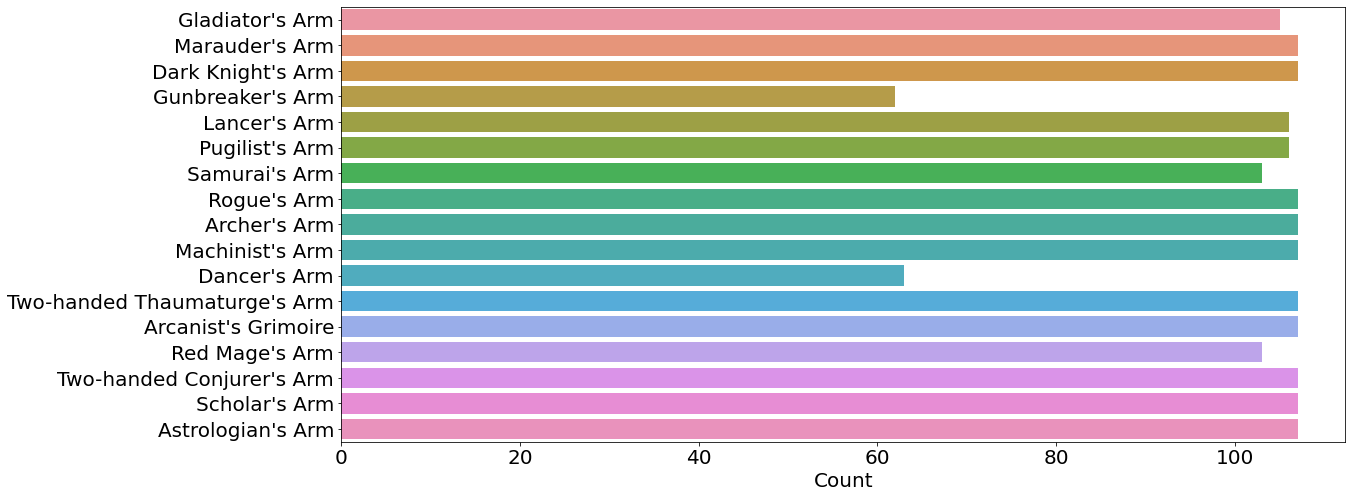

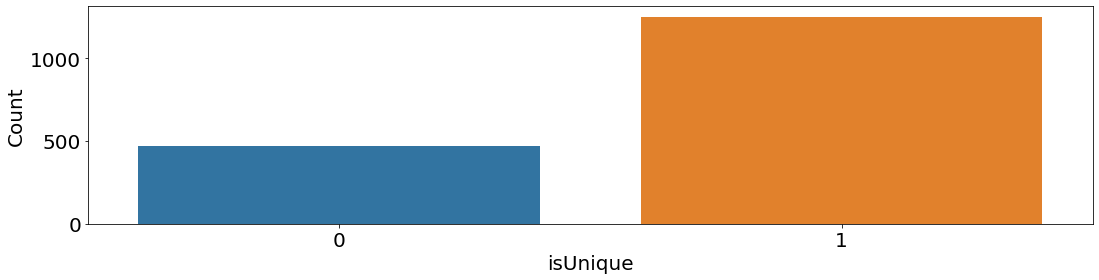

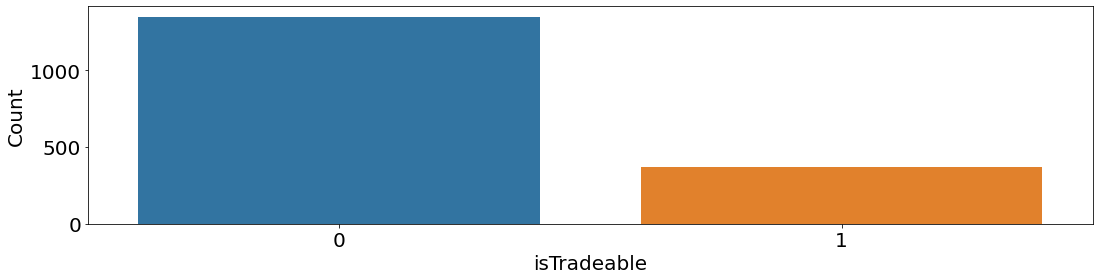

In [12]:
qualt_features = ['name', 'category', 'isUnique', 'isTradeable']

plt.figure(figsize=(18,8))
count = sns.countplot(data = weapon_data, y = 'category')
count.set_xlabel("Count",fontsize=20)
count.set_ylabel('',fontsize=20)
count.tick_params(labelsize=20)
plt.show()

for feature in ['isUnique', 'isTradeable']:
    plt.figure(figsize=(18,4))
    count = sns.countplot(data = weapon_data, x = feature)
    count.set_xlabel(feature,fontsize=20)
    count.set_ylabel('Count',fontsize=20)
    count.tick_params(labelsize=20)
    plt.show()